In [43]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
!ls -la "/content/gdrive/My Drive/darknet"

total 31
drwx------ 2 root root 4096 Sep 23 08:16 backup
drwx------ 2 root root 4096 Sep 23 08:18 backup1
drwx------ 2 root root 4096 Sep 18 12:28 cfg
-rw------- 1 root root  624 Sep 17 10:09 coco.names
drwx------ 2 root root 4096 Sep 15 11:38 cuDNN
drwx------ 2 root root 4096 Sep 18 11:56 img
-rw------- 1 root root  226 Sep 23 08:16 obj.data
-rw------- 1 root root 1349 Sep 23 07:16 test.txt
-rw------- 1 root root 3139 Sep 23 07:14 train.txt
drwx------ 2 root root 4096 Sep 21 12:05 weights


In [45]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [46]:
!tree /content/gdrive/My\ Drive/darknet/

/content/gdrive/My Drive/darknet/
├── backup
│   └── yolov3 _final.weights
├── backup1
│   └── yolov3 _final.weights
├── cfg
│   └── yolov3 .cfg
├── coco.names
├── cuDNN
│   └── cudnn-10.0-linux-x64-v7.5.0.56.tgz
├── img
│   ├── 100.jpg
│   ├── 101.jpg
│   ├── 102.jpg
│   ├── 103.jpg
│   ├── 104.jpg
│   ├── 105.jpg
│   ├── 10.jpg
│   ├── 11.jpg
│   ├── 12.jpg
│   ├── 13.jpg
│   ├── 14.jpg
│   ├── 15.jpg
│   ├── 16.jpg
│   ├── 17.jpg
│   ├── 18.jpg
│   ├── 19.jpg
│   ├── 1.jpg
│   ├── 20.jpg
│   ├── 21.jpg
│   ├── 22.jpg
│   ├── 23.jpg
│   ├── 24.jpg
│   ├── 25.jpg
│   ├── 26.jpg
│   ├── 27.jpg
│   ├── 28.jpg
│   ├── 29.jpg
│   ├── 2.jpg
│   ├── 30.jpg
│   ├── 31.jpg
│   ├── 32.jpg
│   ├── 33.jpg
│   ├── 34.jpg
│   ├── 35.jpg
│   ├── 36.jpg
│   ├── 37.jpg
│   ├── 38.jpg
│   ├── 39.jpg
│   ├── 3.jpg
│   ├── 40.jpg
│   ├── 41.jpg
│   ├── 42.jpg
│   ├── 43.jpg
│   ├── 44.jpg
│   ├── 45.jpg
│   ├── 46.jpg
│   ├── 47.jpg
│   ├── 48.jpg
│   ├── 49.jpg
│   ├── 4.jpg
│   ├── 50.jpg
│   ├── 51.j

In [47]:
!/usr/local/cuda/bin/nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [48]:

!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h


tar (child): gdrive/My Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [49]:
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [50]:
!git clone https://github.com/kriyeng/darknet/
%cd darknet


fatal: destination path 'darknet' already exists and is not an empty directory.
[Errno 20] Not a directory: 'darknet'
/content/darknet


In [51]:
!ls


3rdparty      cmake		      image_yolov2.sh	     predictions.jpg
appveyor.yml  CMakeLists.txt	      image_yolov3.sh	     README.md
backup	      CMakeSettings.json      include		     results
bad.list      darknet		      json_mjpeg_streams.sh  scripts
build	      DarknetConfig.cmake.in  LICENSE		     src
build.ps1     darknet.py	      Makefile		     video_v2.sh
build.sh      darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
cfg	      data		      obj		     yolov3.weights


In [52]:
!git checkout feature/google-colab


Already on 'feature/google-colab'
Your branch is up to date with 'origin/feature/google-colab'.


In [53]:
!make


chmod +x *.sh


In [0]:
!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

cp: cannot create regular file '/content/gdrive/My Drive/darknet/bin/darknet': No such file or directory


In [0]:
!chmod +x ./darknet

In [0]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [56]:
# Not necessary cell
# Get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-09-23 10:55:52--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  23.1MB/s    in 11s     

2019-09-23 10:56:04 (21.4 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

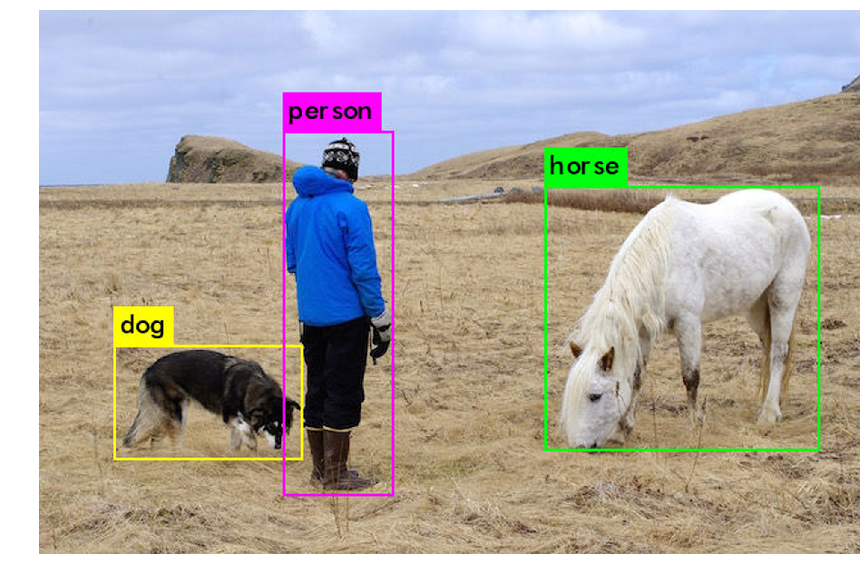

In [57]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [0]:
!./darknet detector train "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/cfg/yolov3 .cfg" "/content/gdrive/My Drive/darknet/backup/yolov3 _final.weights" -dont_show 

yolov3 
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 B

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

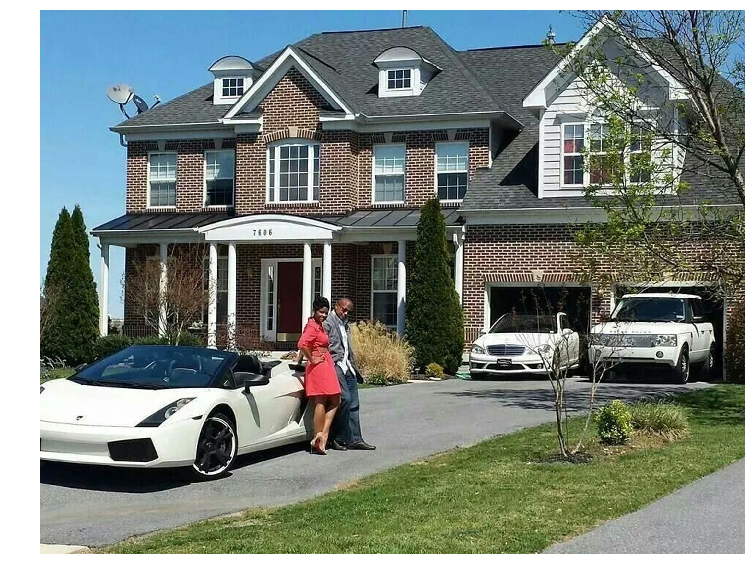

In [0]:
!./darknet detect  "/content/gdrive/My Drive/darknet/cfg/yolov3 .cfg" "/content/gdrive/My Drive/darknet/backup1/yolov3 _final.weights" "/content/gdrive/My Drive/darknet/img/test1.jpg" -dont-show
imShow('/content/gdrive/My Drive/darknet/img/test1.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

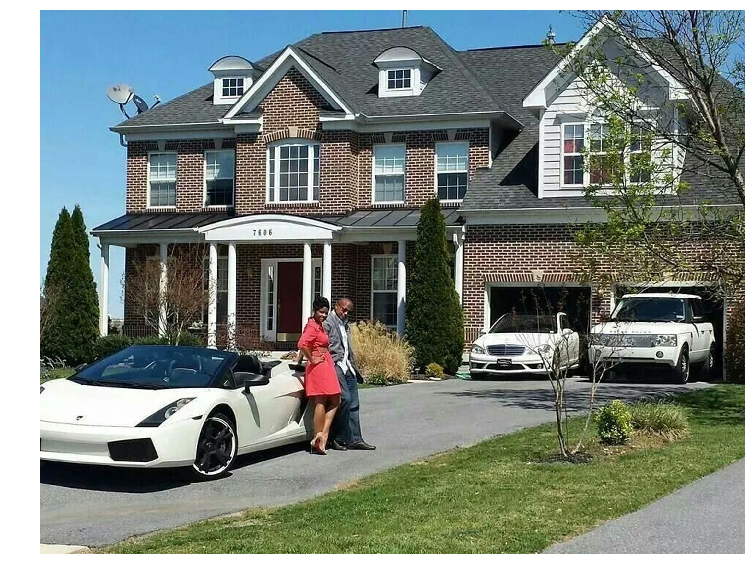

In [0]:
!./darknet detect  "/content/gdrive/My Drive/darknet/cfg/yolov3 .cfg" "/content/gdrive/My Drive/darknet/weights/yolov3.weights" "/content/gdrive/My Drive/darknet/img/test1.jpg" -dont-show
imShow('/content/gdrive/My Drive/darknet/img/test1.jpg')